<a href="https://colab.research.google.com/github/BaimYow/SKPI-ML/blob/main/SKPI_02_klasifikasi_Cat_%26_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT KLASIFIKASI CAT 7 DOG


1.LOAD DATASET


In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog -p /content/ --force

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 98% 213M/218M [00:01<00:00, 160MB/s]
100% 218M/218M [00:01<00:00, 150MB/s]


In [ ]:
import zipfile
zip_path = '/content/cat-and-dog.zip'
extract_to = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
import os
import shutil

def copy_tree(src_dir, dest_dir):
    """ Salin semua file dan folder dari src_dir ke dest_dir """
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for item in os.listdir(src_dir):
        s = os.path.join(src_dir, item)
        d = os.path.join(dest_dir, item)
        if os.path.isdir(s):
            # Jika item adalah folder, salin folder dan isinya
            shutil.copytree(s, d, dirs_exist_ok=True)
        else:
            # Jika item adalah file, salin file
            shutil.copy2(s, d)

# Path ke folder
train_dir = '/content/data/training_set/training_set'
test_dir = '/content/data/test_set/test_set'
dataset_dir = '/content/data/datasets'

# Salin folder dari training_set dan test_set ke datasets
copy_tree(train_dir, dataset_dir)
copy_tree(test_dir, dataset_dir)

print("Penggabungan selesai!")

Penggabungan selesai!


In [ ]:
import os
import shutil
from pathlib import Path
import pandas as pd
dataset = "/content/data/datasets"
directory_path = Path(dataset)
filepaths_png = list(directory_path.glob(r'**/*.png'))
filepaths_jpeg = list(directory_path.glob(r'**/*.jpg')) + list(directory_path.glob(r'**/*.jpeg'))
filepaths = filepaths_png + filepaths_jpeg
labels = [os.path.split(os.path.split(x)[0])[1] for x in filepaths]
filepaths = pd.DataFrame(filepaths, columns=['Filepath']).astype(str)
labels = pd.DataFrame(labels, columns=['Label'])
image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop=True)
image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop=True)
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10028 entries, 0 to 10027
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  10028 non-null  object
 1   Label     10028 non-null  object
dtypes: object(2)
memory usage: 156.8+ KB


VALIDASI KELAS


In [ ]:
import os

def list_folders_in_directory(directory):
    folders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
    return sorted(folders)

print(list_folders_in_directory(dataset))


['cats', 'dogs']


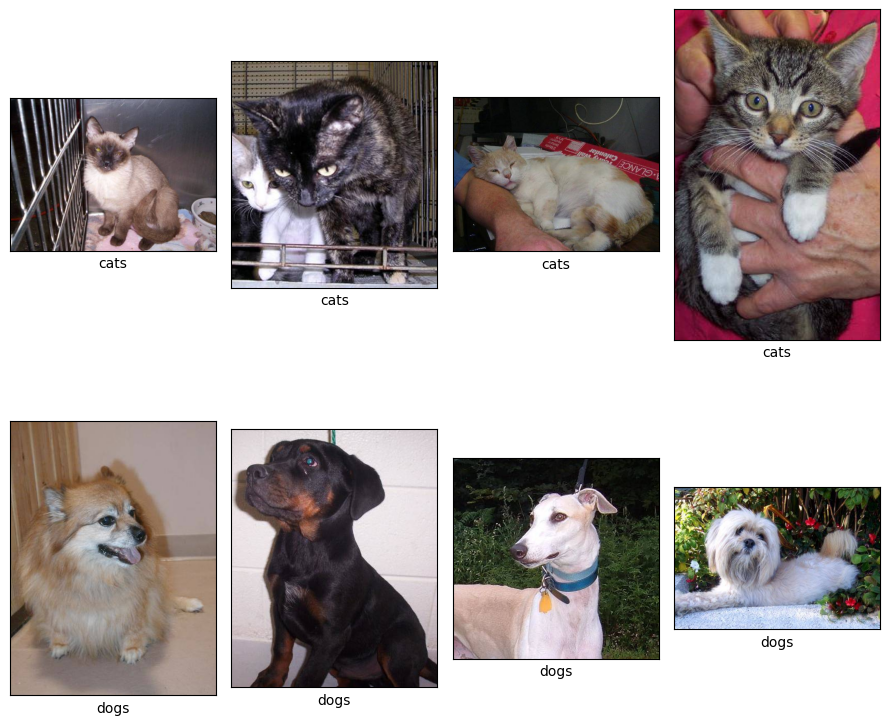

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
dataset_img = {}

for class_name in os.listdir(directory_path):
    dataset_img[class_name] = os.listdir(os.path.join(directory_path, class_name))

random_classes = np.random.choice(list(dataset_img.keys()), 2, replace=False)

fig, axs = plt.subplots(len(random_classes), 4, figsize=(9, 9))

for i, class_name in enumerate(random_classes):
    images = np.random.choice(dataset_img[class_name], 4, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(directory_path, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])
        img.close()

fig.tight_layout()
plt.show()

In [ ]:
file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(directory_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_data = pd.DataFrame({
    "path": full_path,
    'file_name': file_name,
    "labels": labels
})

distribution_data['labels'] = distribution_data['labels'].astype('category')
# menampilkan sampel data distribution data
distribution_data.sample(5)


,path,file_name,labels
9409,/content/data/datasets/cats/cat.125.jpg,cat.125.jpg,cats
4746,/content/data/datasets/dogs/dog.1778.jpg,dog.1778.jpg,dogs
5030,/content/data/datasets/cats/cat.2921.jpg,cat.2921.jpg,cats
7796,/content/data/datasets/cats/cat.4914.jpg,cat.4914.jpg,cats
346,/content/data/datasets/dogs/dog.4459.jpg,dog.4459.jpg,dogs


SPLIT DATA UNTUK MEMBUAT MODEL

database dibagi menjadi 80% tren set dan 20% test set

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    distribution_data, test_size=0.2, shuffle=True, random_state=1, stratify=distribution_data['labels'])
train_df = train_df.rename(columns={'path': 'Filepath', 'labels': 'Label'})
test_df = test_df.rename(columns={'path': 'Filepath', 'labels': 'Label'})
#menampilkan data sample train_df dan test_df
train_df.sample(5)
test_df.sample(5)
train_df.info(5)
test_df.info(5)


<class 'pandas.core.frame.DataFrame'>
Index: 8024 entries, 8145 to 5963
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Filepath   8024 non-null   object  
 1   file_name  8024 non-null   object  
 2   Label      8024 non-null   category
dtypes: category(1), object(2)
memory usage: 196.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 7093 to 6113
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Filepath   2006 non-null   object  
 1   file_name  2006 non-null   object  
 2   Label      2006 non-null   category
dtypes: category(1), object(2)
memory usage: 49.1+ KB


IMAGE DATA GENERATOR

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)

# Hanya rescale untuk validation set (tidak perlu augmentasi)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
)

Found 8023 validated image filenames belonging to 2 classes.
Found 2005 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


PEMBUATAN MODEL


model menggunakan model sequential, Conv2D, Pooling Layyer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

num_classes = len(train_generator.class_indices)  # Jumlah kelas
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,482 (25.99 MB)

 Trainable params: 6,812,482 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

MENGIMPLEMENTASIKAN CALLBACK

In [ ]:
from keras.callbacks import Callback
class AccuracyBasedEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', target_accuracy=0.85, patience=3, verbose=0):
        super(AccuracyBasedEarlyStopping, self).__init__()
        self.monitor = monitor
        self.target_accuracy = target_accuracy
        self.patience = patience
        self.verbose = verbose
        self.wait = 0
        self.best = 0
        self.stopped_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_accuracy = logs.get(self.monitor)
        if val_accuracy is not None:
            if val_accuracy >= self.target_accuracy:
                if self.verbose > 0:
                    print(f"\nEpoch {epoch + 1}: {self.monitor} has reached target of {self.target_accuracy:.2f}. Stopping training.")
                self.model.stop_training = True
        else:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: {self.monitor} not available. Continuing training.")

In [ ]:

early_stop = AccuracyBasedEarlyStopping(monitor='val_accuracy', target_accuracy=0.90, patience=5, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001, monitor='val_loss')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),


TRAINING MODEL

In [ ]:
import time
start_time = time.time()

history = model.fit(
    train_generator,
    epochs=55,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stop, lr_scheduler]
)

execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")


NameError: name 'model' is not defined